# Handwritten Digits Classifier

For this analysis, I use the hand-written digits dataset from UCI machine learning repository <a href="http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits">URL</a>. This dataset is also preloaded in scikit-learn. I use different specifications of deep neural networks (DNN) model to classify the hand-writted digits. By increasing the number of layers, the accurary reaches up to 96%.

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

digits_data = load_digits()

In [2]:
print(type(digits_data), "\n")
digits_data.keys()

<class 'sklearn.utils.Bunch'> 



dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
labels = pd.Series(digits_data['target'])
data = pd.DataFrame(digits_data['data'])
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
print(labels.head(5))

0    0
1    1
2    2
3    3
4    4
dtype: int32


## Visual Inspection
Since dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (8 x 8 pixels).

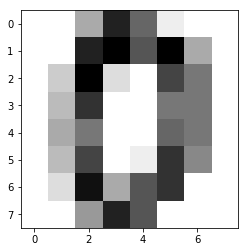

In [5]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')

The following codes visualize some of the images in the dataset using Matplotlib and generate a scatter plot grid, with 2 rows and 4 columns. In the first row images corresponding to rows 0, 100, 200, and 300 are displayed. In the second row images corresponding to rows 1000, 1100, 1200, and 1300 are displayed.

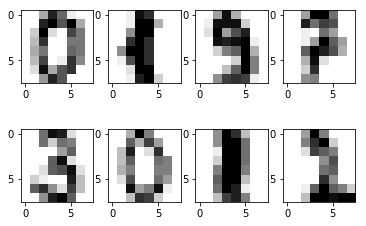

In [6]:
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

## Neural Network With One Hidden Layer

In [7]:
# suppress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

# train the model
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

# test the model
def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

# 4 fold cross validation
def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

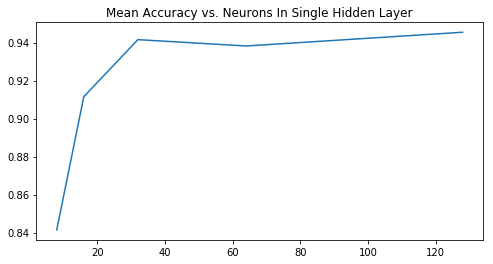

In [9]:
#single layer specification with varying number of neurons
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,)
]
nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)

In [10]:
nn_one_accuracies

[0.8413647611977233,
 0.9115132392972037,
 0.9415602573620392,
 0.9382207374412274,
 0.9454578074733977]

Adding more neurons to the single hidden layer improves the accuracy from approximately 85% to approximately 94.5%.

## Neural Network With Two Hidden Layers

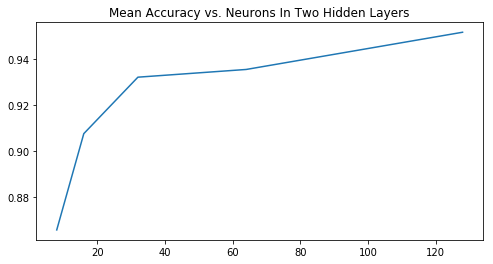

In [11]:
#two layers specification with varying number of neurons
nn_two_neurons = [
    (8,8),
    (16,16),
    (32,32),
    (64, 64),
    (128, 128)    
]
nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)

In [12]:
nn_two_accuracies

[0.8658834446919079,
 0.9076194011383321,
 0.9320984904726554,
 0.9354429596634497,
 0.9515800544419698]

When 2 hidden layers are used in the model, the accuracy improves to 95%.

## Neural Network With Three Hidden Layers

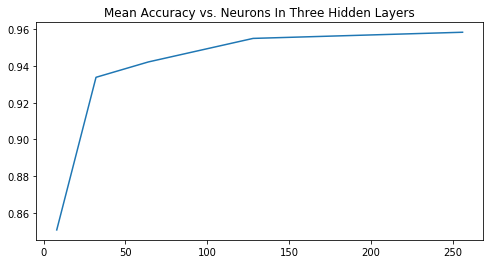

In [13]:
#three layers specification with varying number of neurons
nn_three_neurons = [
    (8, 8, 8),
    (32, 32, 32),
    (64, 64, 64),
    (128, 128, 128),
    (256, 256, 256)
]

nn_three_accuracies = []

for n in nn_three_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)

In [14]:
nn_three_accuracies

[0.8508599356594901,
 0.9337787676317743,
 0.942133135362534,
 0.9549183370452858,
 0.9582652808710715]

Using 3 hidden layers improved our simple accuracy to 96%. This skows that more layers and more neurons tends to improve the network's performance.